In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_excel('DS1_C4_S9_Car_Data.xlsx')
print(df.columns)

Index(['S. No.', 'Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Fuel_Type',
       'Height_mm', 'Length_mm', 'Width_mm', 'Body_Type', 'Doors',
       'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Kerb_Weight',
       'Power', 'Torque', 'Seating_Capacity', 'Central_Locking',
       'Child_Safety_Locks', 'Hill_Assist', 'Drive_Modes',
       'High_Speed_Alert_System', 'ABS_(Anti-lock_Braking_System)',
       'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning',
       'Fasten_Seat_Belt_Warning'],
      dtype='object')


In [46]:
# Step 1: Count the number of missing values in each column
missing_values_count = df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)

# Step 2: Define a function for imputing missing values
def impute_missing_values(group):
    # Impute numerical columns
    for column in group.select_dtypes(include='number').columns:
        # Use mean or median based on preference; here using mean as an example
        group[column].fillna(group[column].mean(), inplace=True)
    
    # Impute categorical columns
    for column in group.select_dtypes(include='object').columns:
        group[column].fillna("Not Available", inplace=True)
    
    return group


Missing values in each column:
S. No.                             0
Make                               0
Model                              0
Variant                            0
Displacement                       0
Cylinders                          2
Valves_Per_Cylinder                0
Fuel_Tank_Capacity_litre          17
Fuel_Type                          0
Height_mm                          0
Length_mm                          0
Width_mm                          11
Body_Type                          0
Doors                              0
City_Mileage_km_litre             62
Highway_Mileage_km_litre          72
Kerb_Weight                        0
Power                              0
Torque                             0
Seating_Capacity                   0
Central_Locking                    0
Child_Safety_Locks                 0
Hill_Assist                        0
Drive_Modes                        0
High_Speed_Alert_System            0
ABS_(Anti-lock_Braking_System)     0
Gross_V

In [ ]:
# Task 1
# A car manufacturer wants to introduce a new car and requires information about the top 5 most preferred car body types.
# Display the results using a horizontal bar chart.

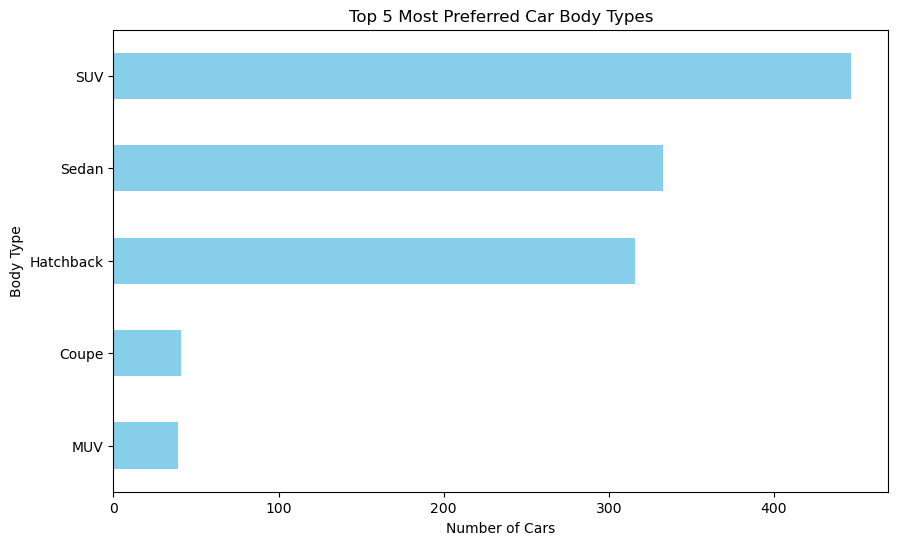

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')

# Group the data by 'Body_Type' and count the occurrences
body_type_counts = df['Body_Type'].value_counts().head(5)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
body_type_counts.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Preferred Car Body Types')
plt.xlabel('Number of Cars')
plt.ylabel('Body Type')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()


In [14]:
# Task 2
# List all the details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode.
# How many cars have all the above-mentioned features?

In [50]:
filtered_cars = df[df['Drive_Modes'].str.contains('Normal', na=False) &
                   df['Drive_Modes'].str.contains('Comfort', na=False) &
                   df['Drive_Modes'].str.contains('Eco', na=False) &
                   df['Drive_Modes'].str.contains('Sport', na=False) &
                   df['Drive_Modes'].str.contains('Power', na=False)]

# Display all details of the filtered cars
print("Details of cars with all driving modes:")
print(filtered_cars)

# Count how many cars have all the features
car_count = filtered_cars.shape[0]
print(f"Number of cars with all the mentioned features: {car_count}")

Details of cars with all driving modes:
     S. No.  Make Model                    Variant  Displacement  Cylinders  \
321     321  Audi    Q8  55 Tfsi Quattro Tiptronic        2995.0        4.0   
330     330  Audi  A8 L            55 Tfsi Quattro        2995.0        8.0   

     Valves_Per_Cylinder  Fuel_Tank_Capacity_litre Fuel_Type  Height_mm  ...  \
321                  4.0                      85.0    Petrol     1740.0  ...   
330                  4.0                      82.0    Petrol     1485.0  ...   

     Central_Locking  Child_Safety_Locks Hill_Assist  \
321              Yes                 Yes         Yes   
330              Yes                 Yes         Yes   

                                 Drive_Modes  High_Speed_Alert_System  \
321  Normal, Comfort, Eco, Sport, Power Mode                      Yes   
330  Normal, Comfort, Eco, Sport, Power Mode                      Yes   

     ABS_(Anti-lock_Braking_System) Gross_Vehicle_Weight  \
321                             

In [ ]:
# Task 3
# Evaluate the fuel efficiency of different car models by analyzing city and highway mileage, helping manufacturers focus on eco- friendly designs.

City_Mileage_km_litre       float64
Highway_Mileage_km_litre    float64
dtype: object
Fuel Efficiency Analysis:
             Make            Model  Average_City_Mileage  \
93           Tata            Tigor                 24.12   
92           Tata            Tiago                 23.84   
62  Maruti Suzuki          Celerio                 23.00   
63  Maruti Suzuki        Celerio X                 23.00   
36        Hyundai  Grand I10 Prime                 21.45   
..            ...              ...                   ...   
71       Maserati       Grancabrio                  4.00   
47    Lamborghini        Aventador                  3.40   
20        Ferrari       458 Spider                  3.20   
21        Ferrari          488 Gtb                  3.20   
8         Bentley      Flying Spur                  2.00   

    Average_Highway_Mileage  
93                23.000000  
92                23.428571  
62                22.000000  
63                22.000000  
36               

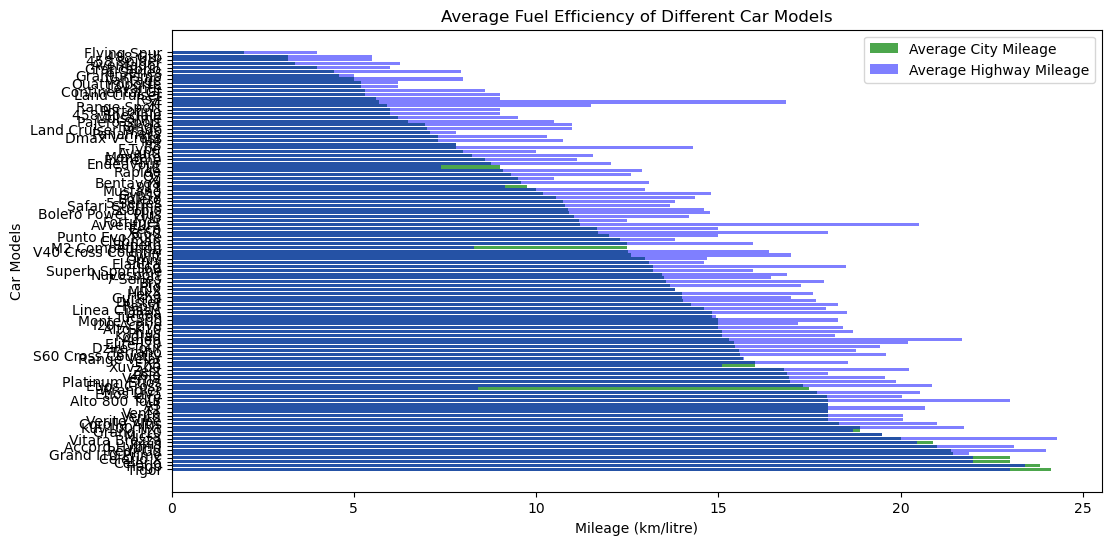

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('DS1_C4_S9_Car_Data.xlsx')

# Check the data types of the relevant columns
print(df[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].dtypes)

# Convert columns to numeric, forcing errors to NaN
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')
df['Highway_Mileage_km_litre'] = pd.to_numeric(df['Highway_Mileage_km_litre'], errors='coerce')

# Drop rows with NaN values in mileage columns
df = df.dropna(subset=['City_Mileage_km_litre', 'Highway_Mileage_km_litre'])

# Group by 'Make' and 'Model' and calculate the average city and highway mileage
mileage_analysis = df.groupby(['Make', 'Model'])[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean().reset_index()

# Rename columns for clarity
mileage_analysis.columns = ['Make', 'Model', 'Average_City_Mileage', 'Average_Highway_Mileage']

# Sort the analysis by average city mileage
mileage_analysis = mileage_analysis.sort_values(by='Average_City_Mileage', ascending=False)

# Display the analysis
print("Fuel Efficiency Analysis:")
print(mileage_analysis)

# Ensure 'Model' is of type string for plotting
mileage_analysis['Model'] = mileage_analysis['Model'].astype(str)

# Plot the average city and highway mileage for each model
plt.figure(figsize=(12, 6))
# Adjusted the plotting to make sure the correct width is specified
plt.barh(mileage_analysis['Model'], mileage_analysis['Average_City_Mileage'], color='green', label='Average City Mileage', alpha=0.7)
plt.barh(mileage_analysis['Model'], mileage_analysis['Average_Highway_Mileage'], color='blue', label='Average Highway Mileage', alpha=0.5)

plt.title('Average Fuel Efficiency of Different Car Models')
plt.xlabel('Mileage (km/litre)')
plt.ylabel('Car Models')
plt.legend()
plt.show()


In [64]:
# Task 4
# Identify the top 20 non-electric car manufacturers based on city mileage and display the results using a bar graph similar to that in task 1.

Top 20 Non-Electric Car Manufacturers based on City Mileage:
             Make  Average_City_Mileage
4          Datsun             21.380000
19  Maruti Suzuki             18.765455
28           Tata             18.484848
15           Jeep             17.500000
30     Volkswagen             16.500000
10          Honda             16.289474
11        Hyundai             16.264615
23         Nissan             16.128571
29         Toyota             15.725250
18       Mahindra             15.155263
26        Renault             14.022222
8           Force             14.000000
27          Skoda             13.953333
7            Fiat             13.854545
25        Premier             13.666667
3             Bmw             13.447857
31          Volvo             13.110000
21           Mini             12.300000
1            Audi             11.042857
13          Isuzu              9.900000


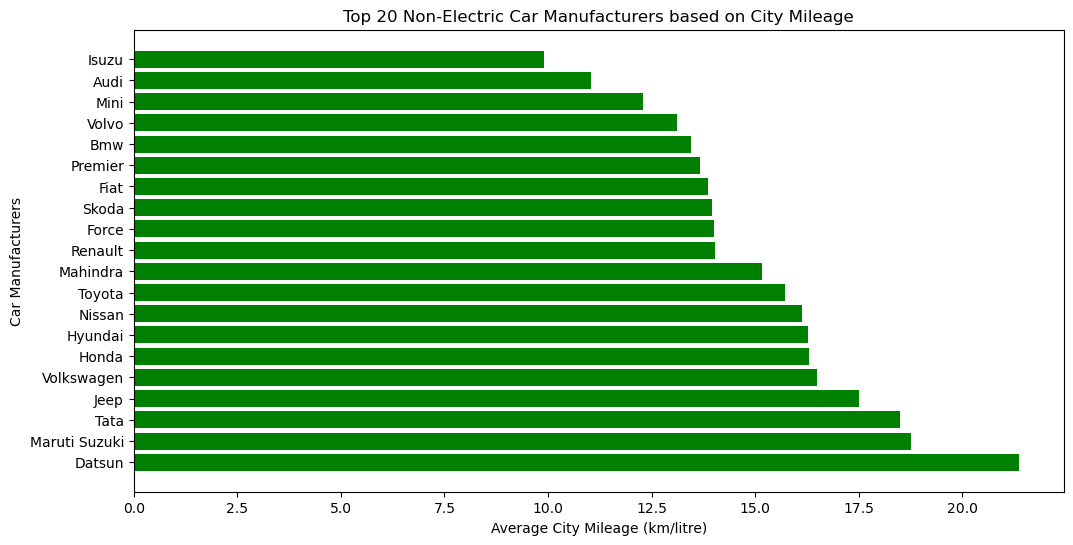

In [58]:


df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')
df['Highway_Mileage_km_litre'] = pd.to_numeric(df['Highway_Mileage_km_litre'], errors='coerce')

df = df.dropna(subset=['City_Mileage_km_litre', 'Highway_Mileage_km_litre'])

df_non_electric = df[df['Fuel_Type'].str.lower() != 'electric']

mileage_analysis = df_non_electric.groupby('Make')['City_Mileage_km_litre'].mean().reset_index()

mileage_analysis.columns = ['Make', 'Average_City_Mileage']

top_20_non_electric = mileage_analysis.sort_values(by='Average_City_Mileage', ascending=False).head(20)

print("Top 20 Non-Electric Car Manufacturers based on City Mileage:")
print(top_20_non_electric)

top_20_non_electric['Make'] = top_20_non_electric['Make'].astype(str)

plt.figure(figsize=(12, 6))
plt.barh(top_20_non_electric['Make'], top_20_non_electric['Average_City_Mileage'], color='green')

plt.title('Top 20 Non-Electric Car Manufacturers based on City Mileage')
plt.xlabel('Average City Mileage (km/litre)')
plt.ylabel('Car Manufacturers')
plt.show()


In [72]:
# Task 5
# Display the car mileages for the following four companies using a pivot table:
# Hyundai, Mahindra, Renault, and Skoda
# Create 4 separate pivot tables capturing the following details: 
# 1. Mean of city mileage
# 2. Median of city mileage 
# 3. Mean of highway mileage 
# 4. Median of highway mileage

In [66]:

df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')
df['Highway_Mileage_km_litre'] = pd.to_numeric(df['Highway_Mileage_km_litre'], errors='coerce')

df = df.dropna(subset=['City_Mileage_km_litre', 'Highway_Mileage_km_litre'])

companies = ['Hyundai', 'Mahindra', 'Renault', 'Skoda']
filtered_df = df[df['Make'].isin(companies)]

# City Mileage
# 1. Mean 
mean_city_mileage = pd.pivot_table(
    filtered_df,
    values='City_Mileage_km_litre',
    index='Make',
    aggfunc='mean'
)

# 2. Median
median_city_mileage = pd.pivot_table(
    filtered_df,
    values='City_Mileage_km_litre',
    index='Make',
    aggfunc='median'
)

# Highway Mileage
# 3. Mean 
mean_highway_mileage = pd.pivot_table(
    filtered_df,
    values='Highway_Mileage_km_litre',
    index='Make',
    aggfunc='mean'
)

# 4. Median 
median_highway_mileage = pd.pivot_table(
    filtered_df,
    values='Highway_Mileage_km_litre',
    index='Make',
    aggfunc='median'
)

print("Mean City Mileage:")
print(mean_city_mileage)
print("\nMedian City Mileage:")
print(median_city_mileage)
print("\nMean Highway Mileage:")
print(mean_highway_mileage)
print("\nMedian Highway Mileage:")
print(median_highway_mileage)


Mean City Mileage:
          City_Mileage_km_litre
Make                           
Hyundai               16.264615
Mahindra              15.155263
Renault               14.022222
Skoda                 13.953333

Median City Mileage:
          City_Mileage_km_litre
Make                           
Hyundai                   16.38
Mahindra                  15.50
Renault                   16.00
Skoda                     14.50

Mean Highway Mileage:
          Highway_Mileage_km_litre
Make                              
Hyundai                  18.304103
Mahindra                 18.140175
Renault                  17.690000
Skoda                    17.571000

Median Highway Mileage:
          Highway_Mileage_km_litre
Make                              
Hyundai                      18.50
Mahindra                     17.21
Renault                      19.60
Skoda                        18.19


In [74]:
# Task 6
# Display the mean and median values of city mileages of the following manufacturers, using a stacked column chart: 
# Hyundai, Renault, Mahindra, and Skoda

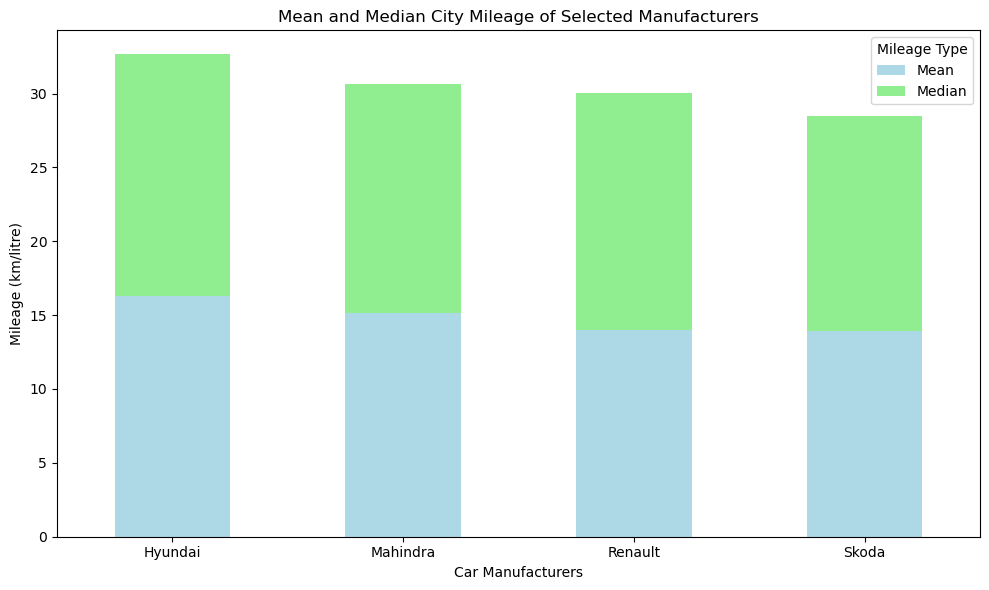

In [78]:
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

df = df.dropna(subset=['City_Mileage_km_litre'])

companies = ['Hyundai', 'Renault', 'Mahindra', 'Skoda']
filtered_df = df[df['Make'].isin(companies)]

mean_city_mileage = filtered_df.groupby('Make')['City_Mileage_km_litre'].mean().reset_index()
median_city_mileage = filtered_df.groupby('Make')['City_Mileage_km_litre'].median().reset_index()

mileage_stats = mean_city_mileage.merge(median_city_mileage, on='Make', suffixes=('_Mean', '_Median'))

mileage_stats.set_index('Make', inplace=True)

mileage_stats.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen'])

plt.title('Mean and Median City Mileage of Selected Manufacturers')
plt.xlabel('Car Manufacturers')
plt.ylabel('Mileage (km/litre)')
plt.xticks(rotation=0)
plt.legend(title='Mileage Type', labels=['Mean', 'Median'])
plt.tight_layout()
plt.show()


In [80]:
# Task 7
# Display the average mileage (city and highway) of all manufacturers using a horizontal bar chart, in ascending order of mileage.

<Figure size 1200x800 with 0 Axes>

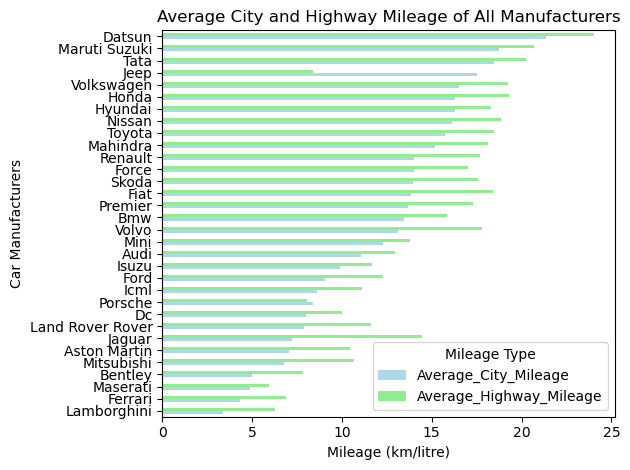

In [84]:
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')
df['Highway_Mileage_km_litre'] = pd.to_numeric(df['Highway_Mileage_km_litre'], errors='coerce')

df = df.dropna(subset=['City_Mileage_km_litre', 'Highway_Mileage_km_litre'])

average_mileage = df.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean().reset_index()

average_mileage.columns = ['Make', 'Average_City_Mileage', 'Average_Highway_Mileage']

average_mileage = average_mileage.sort_values(by=['Average_City_Mileage', 'Average_Highway_Mileage'])

average_mileage.set_index('Make', inplace=True)

plt.figure(figsize=(12, 8))
average_mileage.plot(kind='barh', stacked=False, color=['lightblue', 'lightgreen'])

plt.title('Average City and Highway Mileage of All Manufacturers')
plt.xlabel('Mileage (km/litre)')
plt.ylabel('Car Manufacturers')
plt.legend(title='Mileage Type')
plt.tight_layout()
plt.show()


In [86]:
# Task 8
# Plot a line chart to understand the relation between displacement and city mileage by choosing the top 10 cars with the highest city mileage.
# What do you infer from this graph? Are there any unusual
# observations? If yes, how would you resolve these?

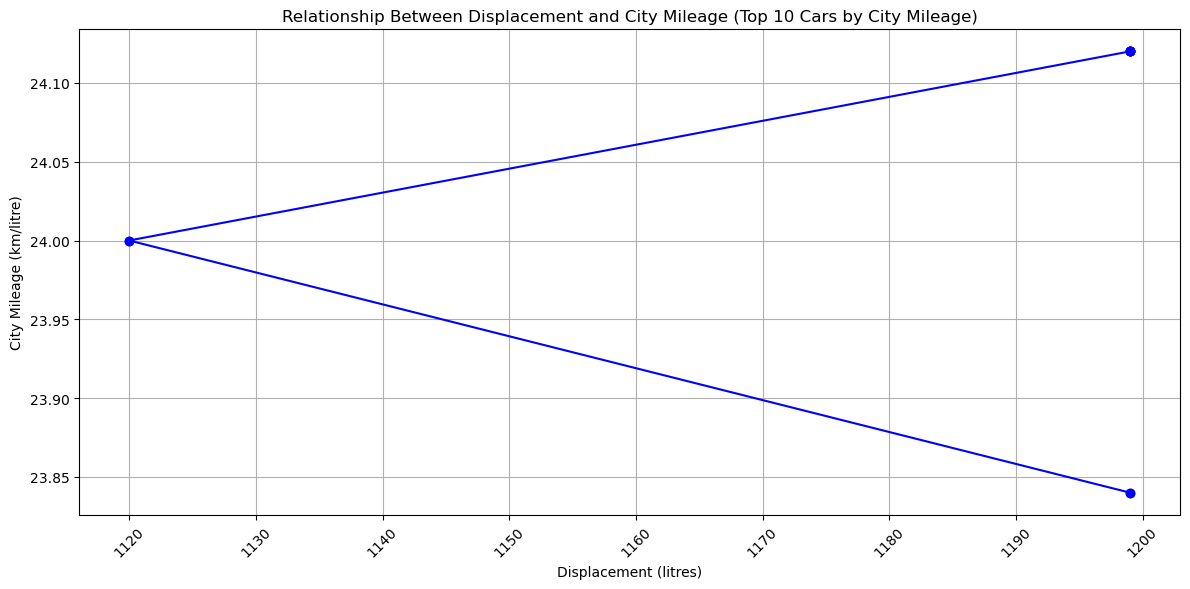

In [88]:
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')
df['Displacement'] = pd.to_numeric(df['Displacement'], errors='coerce')

df = df.dropna(subset=['City_Mileage_km_litre', 'Displacement'])

top_10_cars = df.nlargest(10, 'City_Mileage_km_litre')

plt.figure(figsize=(12, 6))
plt.plot(top_10_cars['Displacement'], top_10_cars['City_Mileage_km_litre'], marker='o', linestyle='-', color='blue')

plt.title('Relationship Between Displacement and City Mileage (Top 10 Cars by City Mileage)')
plt.xlabel('Displacement (litres)')
plt.ylabel('City Mileage (km/litre)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


In [90]:
# Task 9
# Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers:
# Hyundai, Suzuki, Tata, and BMW
# Which of these manufacturers has the most skewed mileage distribution?
# Note: A separate histogram is required for each manufacturer.

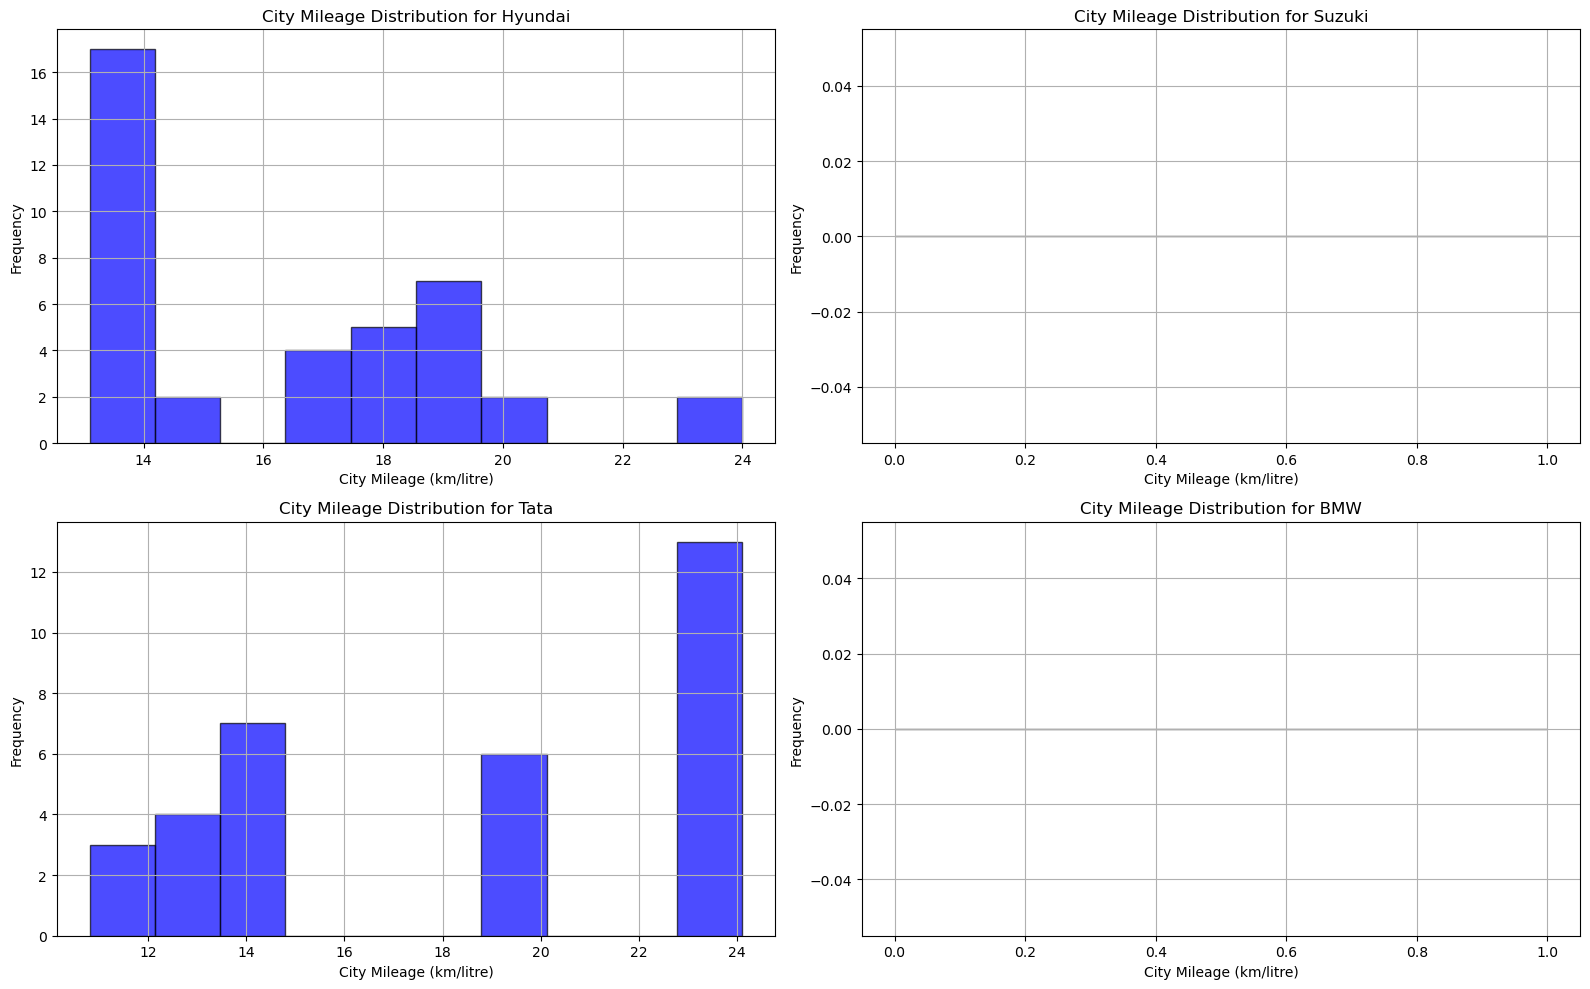

In [92]:
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

df = df.dropna(subset=['City_Mileage_km_litre'])

manufacturers = ['Hyundai', 'Suzuki', 'Tata', 'BMW']
filtered_df = df[df['Make'].isin(manufacturers)]

plt.figure(figsize=(16, 10))

for i, manufacturer in enumerate(manufacturers):
    plt.subplot(2, 2, i + 1)
    plt.hist(filtered_df[filtered_df['Make'] == manufacturer]['City_Mileage_km_litre'],
             bins=10, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'City Mileage Distribution for {manufacturer}')
    plt.xlabel('City Mileage (km/litre)')
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()


In [94]:
# Task 10

# Create another data frame that includes only the following columns from the data. Perform missing value treatment, if required.
# Valves Per Cylinder
# Kerb Weight
# Make
# Displacement
# Fuel Tank Capacity_litre City_Mileage_km_litre Highway_Mileage_km_litre
# Power Torque
# Gross Vehicle_Weight

In [96]:
columns_required = [
    'Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 
    'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 
    'Power', 'Torque', 'Gross_Vehicle_Weight'
]
df_selected = df[columns_required]

print("Missing Values Before Treatment:")
print(df_selected.isnull().sum())

for column in df_selected.columns:
    if df_selected[column].dtype == 'object':  # Categorical column (e.g., 'Make', 'Torque')
        df_selected[column] = df_selected[column].fillna(df_selected[column].mode()[0])
    else:  # Numeric column
        df_selected[column] = df_selected[column].fillna(df_selected[column].median())

print("\nMissing Values After Treatment:")
print(df_selected.isnull().sum())

print("\nCleaned Data (First 5 Rows):")
print(df_selected.head())


Missing Values Before Treatment:
Valves_Per_Cylinder           4
Kerb_Weight                  99
Make                         44
Displacement                  0
Fuel_Tank_Capacity_litre      9
City_Mileage_km_litre         0
Highway_Mileage_km_litre      0
Power                         0
Torque                        2
Gross_Vehicle_Weight        136
dtype: int64

Missing Values After Treatment:
Valves_Per_Cylinder         0
Kerb_Weight                 0
Make                        0
Displacement                0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
Gross_Vehicle_Weight        0
dtype: int64

Cleaned Data (First 5 Rows):
    Valves_Per_Cylinder Kerb_Weight           Make  Displacement  \
6                   4.0      810 kg         Datsun         799.0   
7                   4.0      810 kg         Datsun         799.0   
8                   4.0      810 kg         Datsun    

C:\Users\nagap\AppData\Local\Temp\ipykernel_27688\2160053919.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = df_selected[column].fillna(df_selected[column].median())
C:\Users\nagap\AppData\Local\Temp\ipykernel_27688\2160053919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = df_selected[column].fillna(df_selected[column].mode()[0])


In [ ]:
# Task 11

# Preprocess the data in the following columns as specified. • Kerb weight: Remove "kg" and ensure the column is numerical. 
# Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2. Gross Vehicle_Weight: Remove "kg" and ensure the column is numerical. 
# Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2.

In [55]:
# Function to convert kg to pounds
def kg_to_pounds(weight):
    return float(weight) * 2.2

# Function to clean and convert weight data
def clean_weight_column(column):
    cleaned_values = []
    for value in column:
        # Convert value to string to use replace
        value_str = str(value)
        
        # Remove 'kg' and strip whitespace
        cleaned_value = value_str.replace('kg', '').strip()
        
        # Handle ranges by averaging the values if it's a range
        if '-' in cleaned_value:
            low, high = map(float, cleaned_value.split('-'))
            cleaned_value = (low + high) / 2  # Average the range
        try:
            cleaned_values.append(kg_to_pounds(cleaned_value))
        except ValueError:
            cleaned_values.append(None)  # Handle conversion errors
    return cleaned_values

# Preprocess Kerb_Weight
df['Kerb_Weight'] = clean_weight_column(df['Kerb_Weight'])

# Preprocess Gross_Vehicle_Weight
df['Gross_Vehicle_Weight'] = clean_weight_column(df['Gross_Vehicle_Weight'])

# Display the updated DataFrame
print(df[['Kerb_Weight', 'Gross_Vehicle_Weight']])


      Kerb_Weight  Gross_Vehicle_Weight
0          1452.0                   NaN
1          1595.0                   NaN
2          1562.0                   NaN
3          1595.0                   NaN
4          1595.0                   NaN
...           ...                   ...
1271       2574.0                3399.0
1272       2585.0                3410.0
1273       2435.4                3260.4
1274       2376.0                3201.0
1275       5137.0                6842.0

[1276 rows x 2 columns]


In [100]:
# Task 12

In [108]:
# Select numeric columns for applying median fill
numeric_columns = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder']
df_selected[numeric_columns] = df_selected[numeric_columns].fillna(df_selected[numeric_columns].median())

# Continue with your performance stats calculation
performance_stats = df_selected.groupby('Make').agg(
    Mean_Displacement=('Displacement', 'mean'),
    Median_Displacement=('Displacement', 'median'),
    Mean_Cylinders=('Cylinders', 'mean'),
    Median_Cylinders=('Cylinders', 'median'),
    CV_Cylinders=('Cylinders', lambda x: x.std() / x.mean()),
    Mean_Valves=('Valves_Per_Cylinder', 'mean'),
    Median_Valves=('Valves_Per_Cylinder', 'median'),
    CV_Valves=('Valves_Per_Cylinder', lambda x: x.std() / x.mean())
).reset_index()

print("Performance Statistics by Manufacturer:")
print(performance_stats)


Performance Statistics by Manufacturer:
                Make  Mean_Displacement  Median_Displacement  Mean_Cylinders  \
0       Aston Martin        4958.500000               4958.5       10.000000   
1               Audi        3147.714286               2967.0        6.285714   
2            Bentley        5738.200000               5998.0       10.400000   
3                Bmw        2592.357143               2488.5        5.142857   
4             Datsun         799.000000                799.0        3.000000   
5                 Dc        2000.000000               2000.0        4.000000   
6            Ferrari        4011.600000               3902.0        8.000000   
7               Fiat        1273.818182               1248.0        4.000000   
8              Force        2596.000000               2596.0        4.000000   
9               Ford        3136.250000               2698.0        5.250000   
10             Honda        1523.473684               1497.0        4.000000   


C:\Users\nagap\AppData\Local\Temp\ipykernel_27688\805077676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[numeric_columns] = df_selected[numeric_columns].fillna(df_selected[numeric_columns].median())


In [ ]:
# Task 13
# Identify at least three features that affect the mileages (using correlation analysis) of cars from the following manufacturers: 
# Renault, Toyota, and Honda
# Represent them visually using appropriate types of charts/graphs in Python.
# Illustrate with justification whether these factors affect the mileage of a car positively or negatively.

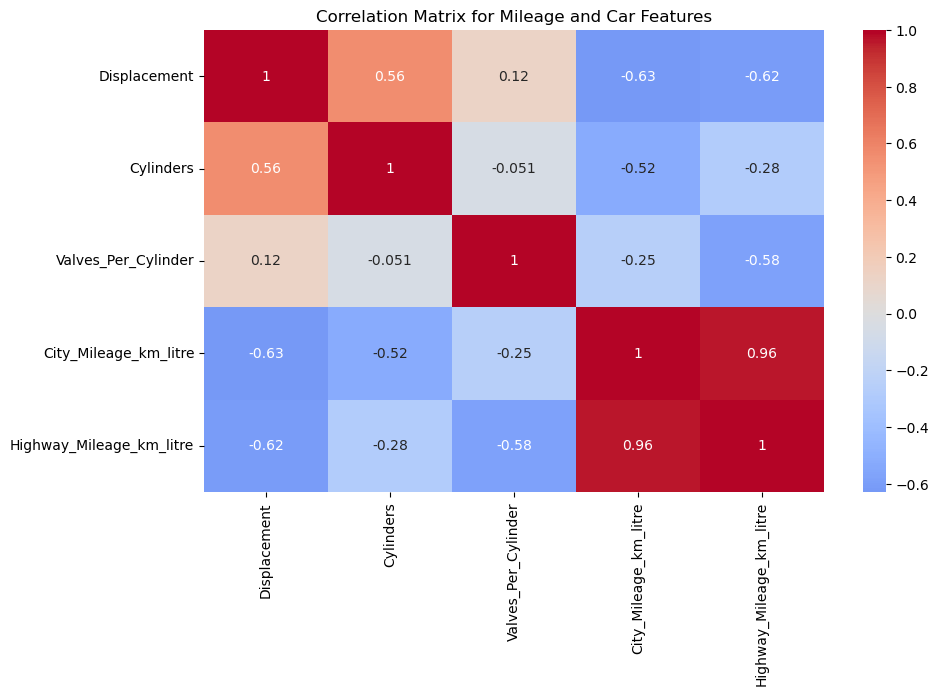

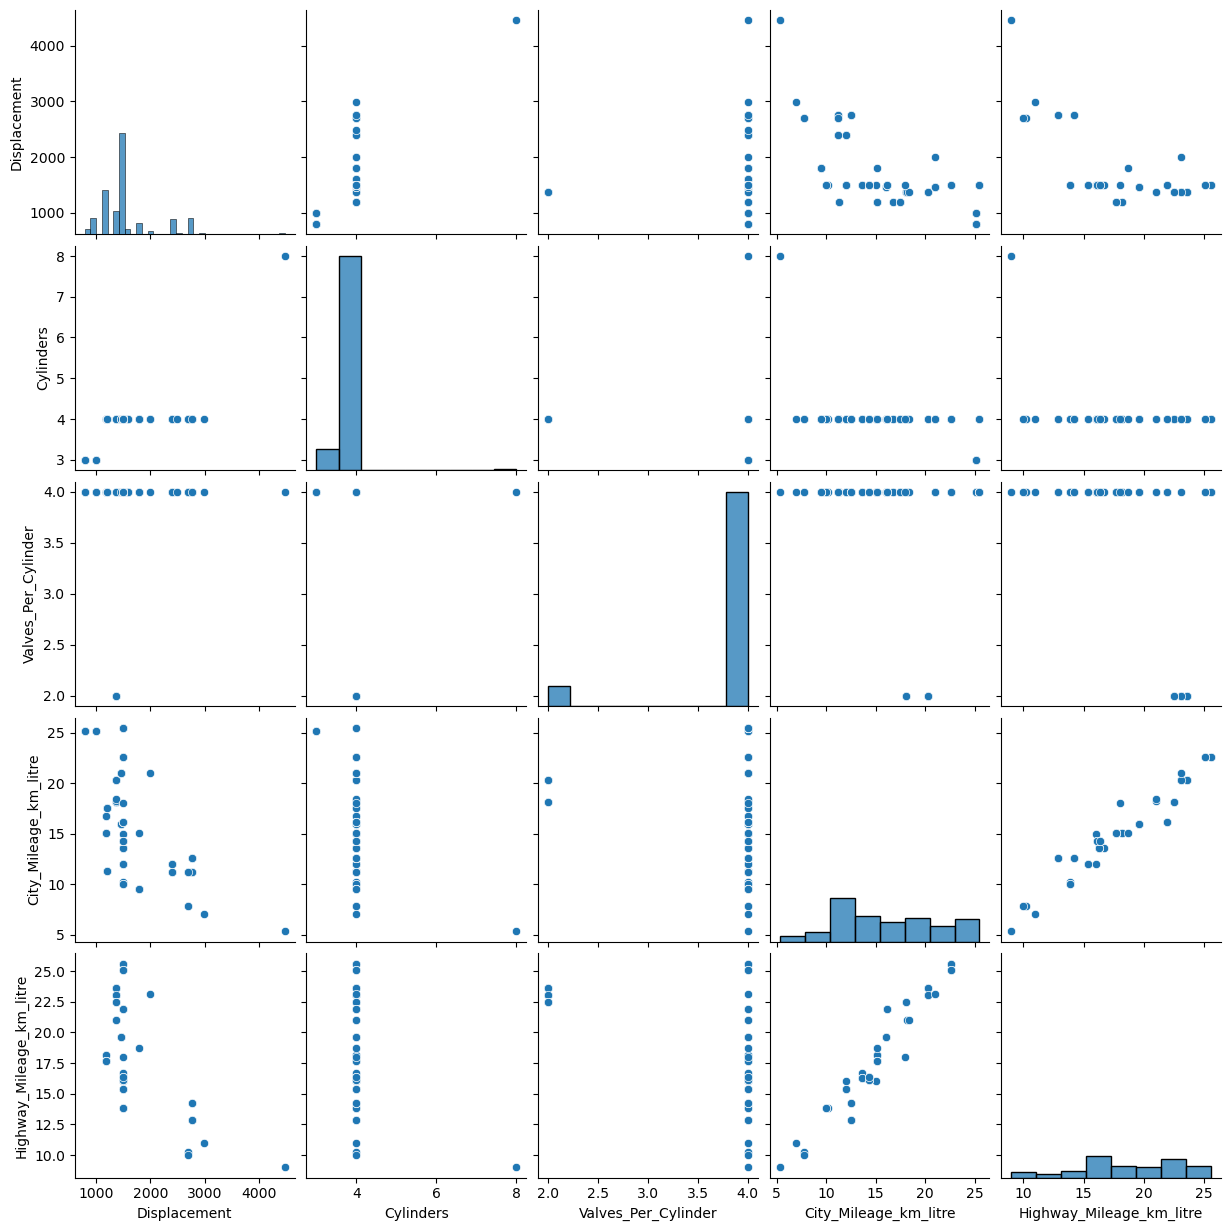

In [18]:

# Filter data for Renault, Toyota, and Honda
df_filtered = df[df['Make'].isin(['Renault', 'Toyota', 'Honda'])]

# Correlation analysis - selecting relevant numerical columns
numerical_columns = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre']
df_numerical = df_filtered[numerical_columns]

# Compute correlation matrix
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Mileage and Car Features')
plt.show()

sns.pairplot(df_numerical)
plt.show()


In [22]:
# Task 14
# Compare the performance of cars based on factors like kerb weight and gross vehicle weight.
# Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer.

In [26]:
# Convert columns to numeric, coercing errors
df_filtered['Kerb_Weight'] = pd.to_numeric(df_filtered['Kerb_Weight'], errors='coerce')
df_filtered['Gross_Vehicle_Weight'] = pd.to_numeric(df_filtered['Gross_Vehicle_Weight'], errors='coerce')

# Now perform the groupby and aggregation
weight_stats = df_filtered.groupby('Make').agg(
    Mean_Kerb_Weight=('Kerb_Weight', 'mean'),
    Median_Kerb_Weight=('Kerb_Weight', 'median'),
    Std_Kerb_Weight=('Kerb_Weight', 'std'),
    CV_Kerb_Weight=('Kerb_Weight', lambda x: (np.std(x) / np.mean(x)) * 100),
    Mean_Gross_Vehicle_Weight=('Gross_Vehicle_Weight', 'mean'),
    Median_Gross_Vehicle_Weight=('Gross_Vehicle_Weight', 'median'),
    Std_Gross_Vehicle_Weight=('Gross_Vehicle_Weight', 'std'),
    CV_Gross_Vehicle_Weight=('Gross_Vehicle_Weight', lambda x: (np.std(x) / np.mean(x)) * 100)
).reset_index()

# Display the calculated statistics
print(weight_stats)


      Make  Mean_Kerb_Weight  Median_Kerb_Weight  Std_Kerb_Weight  \
0    Honda               NaN                 NaN              NaN   
1  Renault               NaN                 NaN              NaN   
2   Toyota               NaN                 NaN              NaN   

   CV_Kerb_Weight  Mean_Gross_Vehicle_Weight  Median_Gross_Vehicle_Weight  \
0             NaN                        NaN                          NaN   
1             NaN                        NaN                          NaN   
2             NaN                        NaN                          NaN   

   Std_Gross_Vehicle_Weight  CV_Gross_Vehicle_Weight  
0                       NaN                      NaN  
1                       NaN                      NaN  
2                       NaN                      NaN  


C:\Users\nagap\AppData\Local\Temp\ipykernel_20084\1748323033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Kerb_Weight'] = pd.to_numeric(df_filtered['Kerb_Weight'], errors='coerce')
C:\Users\nagap\AppData\Local\Temp\ipykernel_20084\1748323033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Gross_Vehicle_Weight'] = pd.to_numeric(df_filtered['Gross_Vehicle_Weight'], errors='coerce')


In [30]:
# SPRINT 10

In [ ]:
# Task 1:
# Examine the presence of safety features such as ABS, airbags, and hill assist, to assess the safety standards of various car models with 
# respect to each feature mentioned above.

In [38]:
# Counting the missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Example of filling missing values
# Assuming 'Power' is a numerical column and 'Model' is a categorical column
df.fillna({
    'Power': df['Power'].mean(),     # For numerical columns
    'Model': 'Unknown'               # For categorical columns
}, inplace=True)

# Safety feature assessment for ABS, Airbags, and Hill Assist
safety_features = df[['ABS_(Anti-lock_Braking_System)', 'Airbags', 'Hill_Assist']].apply(pd.Series.value_counts)
print("Safety Features Assessment:\n", safety_features)

# Filter out cars with specific safety features
cars_with_safety_features = df[df[['ABS_(Anti-lock_Braking_System)', 'Airbags', 'Hill_Assist']].notnull().all(axis=1)]
print("Cars with all mentioned safety features:\n", cars_with_safety_features[['Make', 'Model', 'Variant']])


Missing Values in Each Column:
 S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System         

In [ ]:
# Task 2
# Explore seating capacity, central locking, and child safety locks to understand user comfort and family-friendly features.
# Hint: Calculate the average seating capacity and count the occurrences of central locking and child safety locks for each model.

In [41]:
average_seating_capacity = df['Seating_Capacity'].mean()
print(f"Average Seating Capacity: {average_seating_capacity}")

# Count the occurrences of Central Locking and Child Safety Locks for each model
comfort_features = df.groupby('Model').agg({
    'Seating_Capacity': 'mean',                             # Average seating capacity per model
    'Central_Locking': pd.Series.value_counts,              # Count of central locking per model
    'Child_Safety_Locks': pd.Series.value_counts            # Count of child safety locks per model
}).reset_index()

# Displaying the result
print("User Comfort and Family-Friendly Features:\n", comfort_features)


Average Seating Capacity: 5.27007874015748
User Comfort and Family-Friendly Features:
             Model  Seating_Capacity Central_Locking Child_Safety_Locks
0             718               2.0               2                  2
1             911               4.0               2                  2
2        3-Series               5.0               3                  3
3    458 Speciale               2.0               1                  1
4      458 Spider               2.0               1                 []
..            ...               ...             ...                ...
258          Xylo               7.2               3                  5
259         Yaris               5.0              14                 14
260   Z4 Roadster               2.0               2                  2
261          Zest               5.0              11                 11
262         Zs Ev               5.0               2                  2

[263 rows x 4 columns]


In [43]:
# Task 3
# Investigate the presence of high-speed alerts, seat belt reminders,
# and door-ajar warnings to assess the integration of safety and convenience features with respect to each feature mentioned above.

In [45]:
# Count occurrences of High-Speed Alert System, Fasten Seat Belt Warning, and Door Ajar Warning for each model
safety_convenience_features = df.groupby('Model').agg({
    'High_Speed_Alert_System': pd.Series.value_counts,   # Count of high-speed alert system per model
    'Fasten_Seat_Belt_Warning': pd.Series.value_counts,  # Count of seat belt reminders per model
    'Door_Ajar_Warning': pd.Series.value_counts          # Count of door-ajar warnings per model
}).reset_index()

# Displaying the result
print("Safety and Convenience Features:\n", safety_convenience_features)


Safety and Convenience Features:
             Model High_Speed_Alert_System Fasten_Seat_Belt_Warning  \
0             718                      []                        2   
1             911                      []                        2   
2        3-Series                       3                        3   
3    458 Speciale                      []                        1   
4      458 Spider                      []                        1   
..            ...                     ...                      ...   
258          Xylo                      []                        3   
259         Yaris                      14                       14   
260   Z4 Roadster                      []                        2   
261          Zest                      []                       11   
262         Zs Ev                       2                        2   

    Door_Ajar_Warning  
0                   2  
1                   2  
2                   3  
3                   1  
4    

In [47]:
# Task 4
# Analyze the dimensions of cars (height, length, width) to understand size preferences and market demands, aiding in product planning.
# Also, present make-wise average summaries for all dimensions of cars analyzed above.

In [49]:
# Step 1: Analyzing car dimensions (height, length, width) overall
average_dimensions = df[['Height_mm', 'Length_mm', 'Width_mm']].mean()
print("Average Car Dimensions (Overall):\n", average_dimensions)

# Step 2: Calculating make-wise average summaries for height, length, and width
make_wise_dimensions = df.groupby('Make').agg({
    'Height_mm': 'mean',
    'Length_mm': 'mean',
    'Width_mm': 'mean'
}).reset_index()

# Renaming columns for better clarity
make_wise_dimensions.columns = ['Make', 'Average_Height_mm', 'Average_Length_mm', 'Average_Width_mm']

# Displaying the make-wise summary of car dimensions
print("\nMake-wise Average Dimensions:\n", make_wise_dimensions)


Average Car Dimensions (Overall):
 Height_mm    1592.539608
Length_mm    4296.883730
Width_mm     1788.550506
dtype: float64

Make-wise Average Dimensions:
                 Make  Average_Height_mm  Average_Length_mm  Average_Width_mm
0       Aston Martin        1294.333333        4623.000000       1982.333333
1               Audi        1543.166667        4715.096774       1879.366667
2              Bajaj        1652.000000        2752.000000       1312.000000
3            Bentley        1563.666667        5210.166667       2140.666667
4                Bmw        1541.486486        4816.891892       1980.243243
5            Bugatti        1212.000000        4544.000000       2038.000000
6             Datsun        1520.600000        3644.400000       1605.600000
7                 Dc        1200.000000        4565.000000       2120.000000
8            Ferrari        1275.250000        4668.125000       1956.000000
9               Fiat        1517.739130        4195.086957       1708.565

In [ ]:
Task 5
Summarize all interpretations obtained from all the tasks provided in Sprints 9 and 10.
Provide the final business conclusions to support your analysis for the entire project.
Write challenges faced during completion of the project (ifany) and future scope of this project. 
Prepare a PowerPoint presentation with project requirements, findings from analysis, summary, and business conclusions (Use a maximum of 15 slides).